# SD212: Graph mining
## Lab 3: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.visualization import svg_graph, svg_bigraph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [5]:
n = 10

In [6]:
graph = linear_graph(n, True)
adjacency = graph.adjacency
position = graph.position

In [7]:
image = svg_graph(adjacency, position, names=np.arange(n))

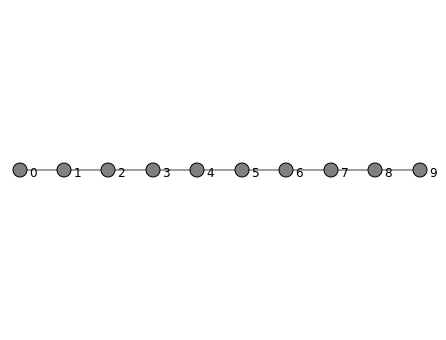

In [8]:
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the **exact** PageRank vector when $\alpha=1$? You need to compute it!

In [9]:
pagerank = PageRank(damping_factor=0.01, solver='lanczos')

In [10]:
scores = pagerank.fit_transform(adjacency)

In [11]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)

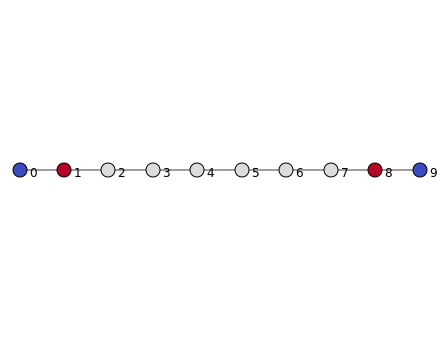

In [12]:
SVG(image)

In [13]:
top_nodes = top_k(scores, 10)
print(top_nodes)
print(scores)

[1 8 2 7 3 6 4 5 0 9]
[0.09950248 0.10049504 0.10000248 0.10000001 0.1        0.1
 0.10000001 0.10000248 0.10049504 0.09950248]


Avec $\alpha = 0.85$ : les noeuds 1 et 8 puis 2 et 7 puis 3 et 6 puis 4 et 5 puis 0 et 9.  
Avec $\alpha = 0.01$ : les noeuds 1 à 8 puis 0 et 9.  
Avec $\alpha = 0.99$ : les noeuds 1 à 8 puis 0 et 9.

## Les Misérables


In [14]:
graph = miserables(True)

In [15]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [16]:
image = svg_graph(adjacency, position, names, scale=2)

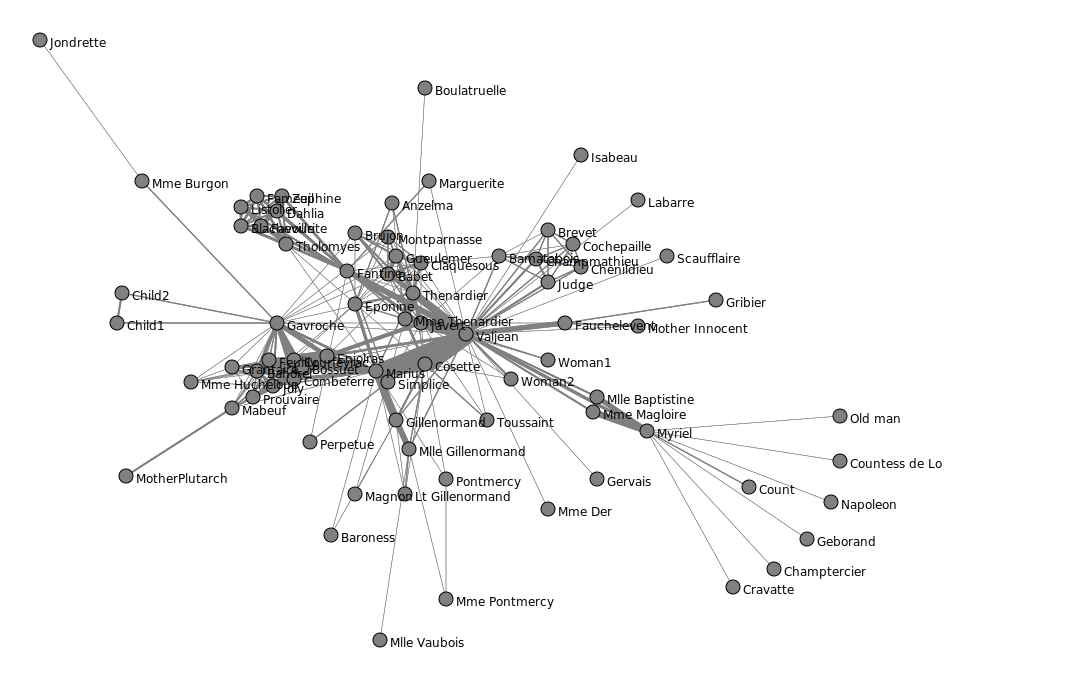

In [17]:
SVG(image)

## To do

* Display the graph with PageRank scores.
* List the 10 best ranked characters.
* Compare with the 10 nodes of highest degrees and the 10 nodes of highest weights.
* Try different values of $\alpha$ (e.g., 0.1, 0.9, 0.99) and interpret the results.

In [18]:
pagerank = PageRank(damping_factor=0.01, solver='lanczos')

In [19]:
scores = pagerank.fit_transform(adjacency)

In [20]:
# scores in log scale are more visible
image = svg_graph(adjacency, position, names, scores=np.log(scores), scale=2)

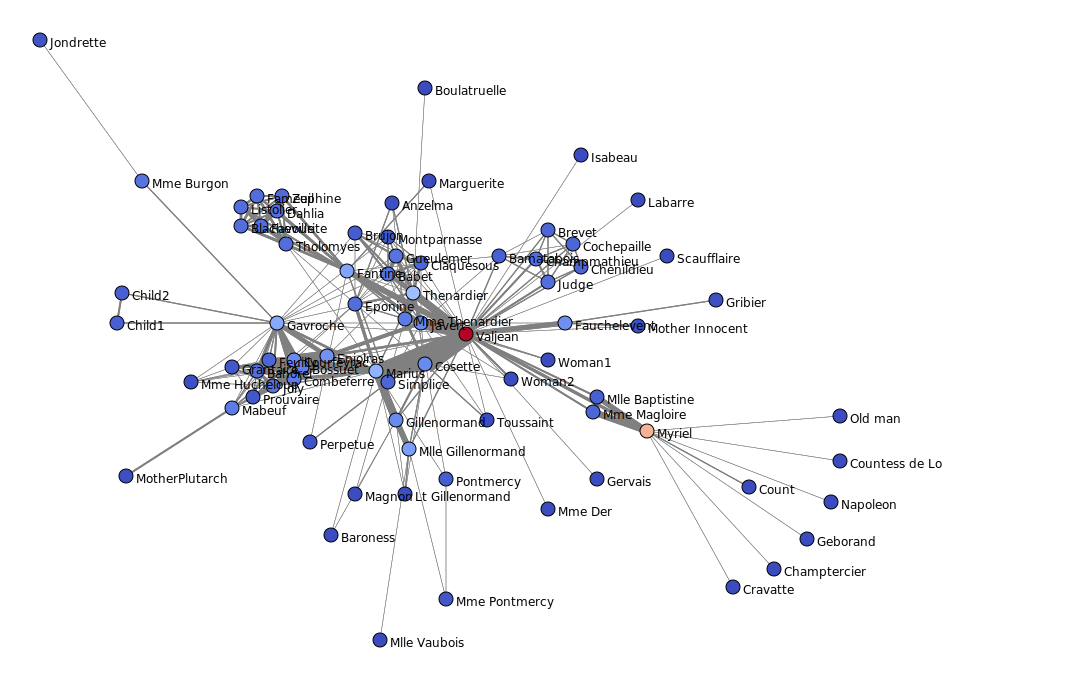

In [21]:
SVG(image)

In [22]:
top_nodes = top_k(scores, 10)

In [23]:
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Valjean
2 Myriel
3 Thenardier
4 Marius
5 Gavroche
6 Fantine
7 Mlle Gillenormand
8 Enjolras
9 Fauchelevent
10 Courfeyrac


$\alpha = 0.85$ : 1 Valjean
2 Marius
3 Myriel
4 Cosette
5 Enjolras
6 Thenardier
7 Courfeyrac
8 Gavroche
9 Fantine
10 Javert  

$\alpha = 0.9$ : 1 Valjean
2 Marius
3 Enjolras
4 Cosette
5 Courfeyrac
6 Thenardier
7 Myriel
8 Combeferre
9 Gavroche
10 Bossuet  

$\alpha = 0.99$ : 1 Valjean
2 Marius
3 Enjolras
4 Courfeyrac
5 Cosette
6 Combeferre
7 Bossuet
8 Thenardier
9 Gavroche
10 Javert

$\alpha = 0.1$ : 1 Valjean
2 Myriel
3 Thenardier
4 Marius
5 Gavroche
6 Fantine
7 Mlle Gillenormand
8 Enjolras
9 Cosette
10 Courfeyrac

## Openflights


In [24]:
graph = openflights

In [25]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [26]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)

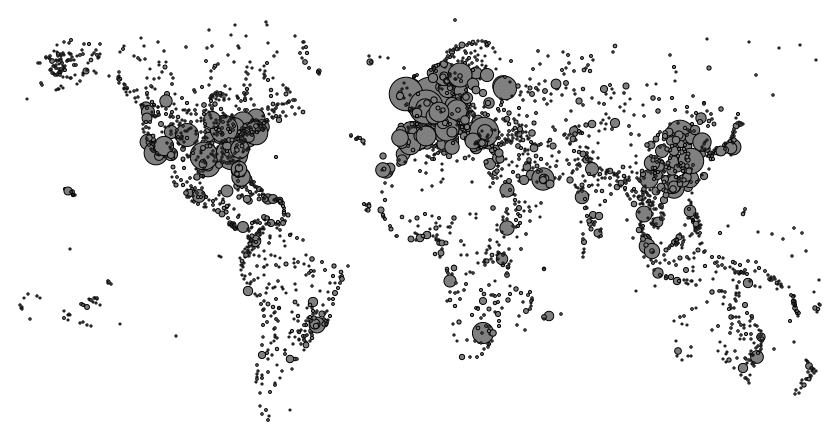

In [27]:
SVG(image)

## To do

* Display the same world map with PageRank scores.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Display the world map with Personalized PageRank scores, starting from Tokyo international airport.
* List the corresponding 10 best ranked airports.

In [28]:
pagerank = PageRank(damping_factor=0.85)

In [29]:
scores = pagerank.fit_transform(adjacency)

In [30]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), width=800, height=400, display_node_weight=True, display_edges=False)

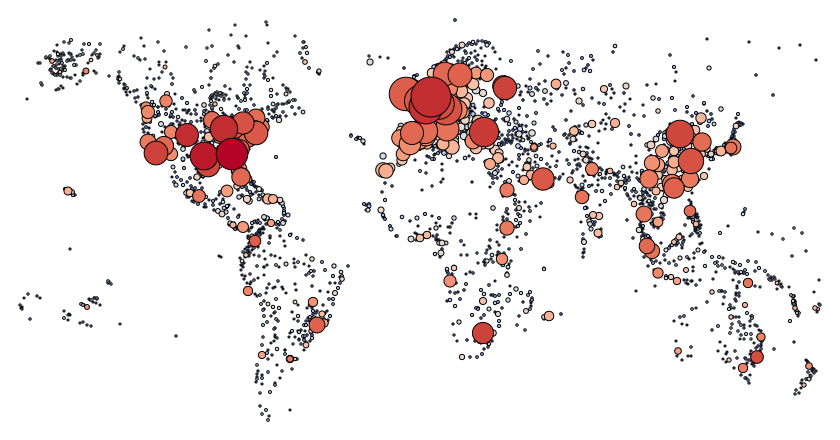

In [31]:
SVG(image)

In [32]:
top_nodes = top_k(scores, 10)

In [33]:
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Hartsfield Jackson Atlanta International Airport
2 Dallas Fort Worth International Airport
3 Amsterdam Airport Schiphol
4 Chicago O'Hare International Airport
5 Denver International Airport
6 Charles de Gaulle International Airport
7 Atatürk International Airport
8 OR Tambo International Airport
9 Los Angeles International Airport
10 Domodedovo International Airport


In [34]:
degrees = adjacency.dot(np.ones(adjacency.shape[0]))
ind = (np.argsort(degrees))[-10:]
for i in range(len(ind)):
    print(i+1, names[ind[9 - i]])

1 Amsterdam Airport Schiphol
2 Charles de Gaulle International Airport
3 Dublin Airport
4 Munich International Airport
5 Hartsfield Jackson Atlanta International Airport
6 London Gatwick Airport
7 Frankfurt am Main International Airport
8 Atatürk International Airport
9 Dallas Fort Worth International Airport
10 Beijing Capital International Airport


In [35]:
tokyo = 1084

In [36]:
pagerank = PageRank()

In [37]:
scores = pagerank.fit_transform(adjacency, seeds = {tokyo: 1})

In [38]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), width=800, height=400, display_node_weight=True, display_edges=False) 

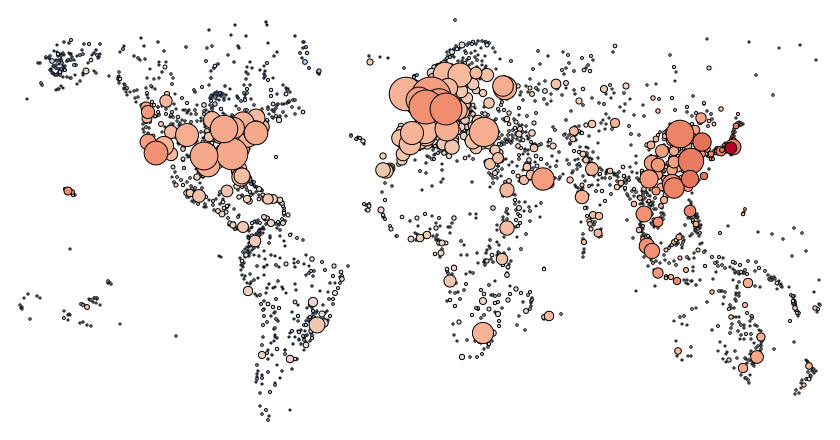

In [39]:
SVG(image)

## 2. Directed graphs

## Wikipedia Vitals

In [40]:
graph = wikivitals

In [41]:
adjacency = graph.adjacency
names = graph.names

In [69]:
n = adjacency.shape[0]
degrees = adjacency.dot(np.ones(n))
print(names[np.argmax(np.sum(adjacency, axis=0))])

Bibliothèque nationale de France


## To do

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [43]:
pagerank = PageRank(solver='lanczos')

In [44]:
scores = pagerank.fit_transform(adjacency)
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Bibliothèque nationale de France
2 United States
3 Geographic coordinate system
4 The New York Times
5 France
6 India
7 Latin
8 China
9 United Kingdom
10 World War II
11 Encyclopædia Britannica
12 Russia
13 Germany
14 Australia
15 Italy
16 Canada
17 Japan
18 Spain
19 Greek language
20 Europe


## To do

* List the 20 closest pages to **Picasso** in Wikipedia Vitals. What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.
* In both cases, propose a method to get the 20 closest pages **specifically** related to the target(s). <br>
**Hint:** Consider the difference between two PageRank scores.

In [45]:
picasso = 4936

In [46]:
cat = 1401

In [47]:
dog = 1395

In [48]:
pagerank = PageRank(damping_factor=0.85)
scores = pagerank.fit_transform(adjacency, seeds = {picasso : 1})
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Pablo Picasso
2 Bibliothèque nationale de France
3 The New York Times
4 Paris
5 Modernism
6 Museum of Modern Art
7 Cubism
8 Avant-garde
9 Symbolism (arts)
10 Impressionism
11 Romanticism
12 Spain
13 France
14 Metropolitan Museum of Art
15 Surrealism
16 United States
17 Geographic coordinate system
18 World War II
19 Vincent van Gogh
20 Encyclopædia Britannica


In [49]:
pagerank = PageRank(damping_factor=0.85)
scores = pagerank.fit_transform(adjacency, seeds = {cat : 1})
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Cat
2 Bibliothèque nationale de France
3 Taxonomy (biology)
4 Animal
5 Mammal
6 The New York Times
7 Germany
8 Chordate
9 Middle Ages
10 Roman Empire
11 Latin
12 United States
13 Dog
14 Aristotle
15 Pinniped
16 Carl Linnaeus
17 Bear
18 Lion
19 Carnivora
20 Leopard


In [50]:
pagerank = PageRank(damping_factor=0.85)
scores = pagerank.fit_transform(adjacency, seeds = {dog : 1})
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Dog
2 Bibliothèque nationale de France
3 Taxonomy (biology)
4 Animal
5 India
6 China
7 Mammal
8 Japan
9 Chordate
10 Species
11 Middle Ages
12 Christianity
13 Islam
14 Lion
15 Indonesia
16 Pinniped
17 Bear
18 Polar bear
19 Carl Linnaeus
20 Cat


## 3. Bipartite graphs

## Cinema

In [51]:
graph = cinema

In [52]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* List the top-10 movies in terms of PageRank.
* List the 5 closest movies to **Mon Oncle**. 
* List the 5 closest actors to **Catherine Deneuve**.

In [53]:
np.where('Catherine Deneuve' == actors)

(array([2173], dtype=int64),)

In [54]:
np.where('Mon Oncle' == movies)

(array([43428], dtype=int64),)

In [55]:
pagerank = BiPageRank()

In [56]:
mon_oncle = 43428
CatherineDeneuve = 2173
seeds_row={mon_oncle: 1, CatherineDeneuve: 1}

In [57]:
pagerank.fit(biadjacency)#, seeds_row)
scores_row = pagerank.scores_row_
scores_col = pagerank.scores_col_

In [58]:
top_nodes = top_k(scores_row, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, movies[node])

1 The Walking Dead (TV series)
2 Tatort
3 Twin Peaks
4 Homeland (TV series)
5 House of Cards (U.S. TV series)
6 Prêt-à-Porter
7 St. Elsewhere
8 Peaky Blinders (TV series)
9 Seances
10 Arrow (TV series)


In [59]:
pagerank.fit(biadjacency, seeds_row)
scores_row = pagerank.scores_row_
scores_col = pagerank.scores_col_

In [60]:
top_nodes = top_k(scores_row, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, movies[node])

1 Mon Oncle
2 A Son of David
3 Jour de fête
4 Cours du soir
5 Gai dimanche
6 The Lady Owner
7 The White Star
8 The Tidal Wave
9 A Dead Certainty
10 Snow in the Desert


In [61]:
top_nodes = top_k(scores_col, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, actors[node])

1 Jacques Tati
2 Ronald Colman
3 Elsie Mackay
4 Arthur Walcott
5 Paul Frankeur
6 Queenie Thomas
7 Violet Hopson
8 Stewart Rome
9 Annie Esmond
10 Sydney Seaward


Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [62]:
graph = wikivitals

In [63]:
adjacency = graph.adjacency
names = graph.names

In [64]:
pagerank = BiPageRank()
pagerank.fit(adjacency, seeds_row = {picasso: 1})
top_nodes = top_k(pagerank.scores_row_, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Pablo Picasso
2 Modernism
3 Cubism
4 Modern art
5 Abstract expressionism
6 Impressionism
7 Surrealism
8 Futurism
9 Symbolism (arts)
10 Expressionism
11 Pop art
12 Avant-garde
13 Postmodernism
14 Paul Klee
15 Dada
16 Minimalism
17 Thomas Mann
18 Modern architecture
19 Franz Kafka
20 20th-century classical music


In [65]:
pagerank = BiPageRank()
pagerank.fit(adjacency, seeds_row={picasso: 1})
top_nodes = top_k(pagerank.scores_row_, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Pablo Picasso
2 Modernism
3 Cubism
4 Modern art
5 Abstract expressionism
6 Impressionism
7 Surrealism
8 Futurism
9 Symbolism (arts)
10 Expressionism
11 Pop art
12 Avant-garde
13 Postmodernism
14 Paul Klee
15 Dada
16 Minimalism
17 Thomas Mann
18 Modern architecture
19 Franz Kafka
20 20th-century classical music


In [66]:
top_nodes

array([4936,  504,  499,  492,  494,  503,  510,  502,  511,  501,  517,
        498,  507, 4925,  500,  514, 5193,   20, 5190,  327], dtype=int64)

In [67]:
'Paul Klee' in names

True

## To do

Do the same experiments as above using BiPageRank:
* List the 10 best ranked pages of Wikipedia Vitals. Give 2 rankings: one for rows, the other for columns.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees, respectively.<br> Interpret the results.

## To do

Using BiPageRank:
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In your opinion, what is the best algorithm for finding related pages in Wikipedia, PageRank or BiPageRank?<br>
Justify your answer.